In [3]:
%matplotlib inline

In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [9]:
dta = sm.datasets.sunspots.load_pandas().data

To get a better picture we're going to use dates instead of times or indexes so we will change the data frame

In [10]:
dta

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
5,1705.0,58.0
6,1706.0,29.0
7,1707.0,20.0
8,1708.0,10.0
9,1709.0,8.0


In [11]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))

In [12]:
dta

,YEAR,SUNACTIVITY
1700-12-31,1700.0,5.0
1701-12-31,1701.0,11.0
1702-12-31,1702.0,16.0
1703-12-31,1703.0,23.0
1704-12-31,1704.0,36.0
1705-12-31,1705.0,58.0
1706-12-31,1706.0,29.0
1707-12-31,1707.0,20.0
1708-12-31,1708.0,10.0
1709-12-31,1709.0,8.0


In [13]:
del dta["YEAR"]

In [14]:
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
1705-12-31,58.0
1706-12-31,29.0
1707-12-31,20.0
1708-12-31,10.0
1709-12-31,8.0


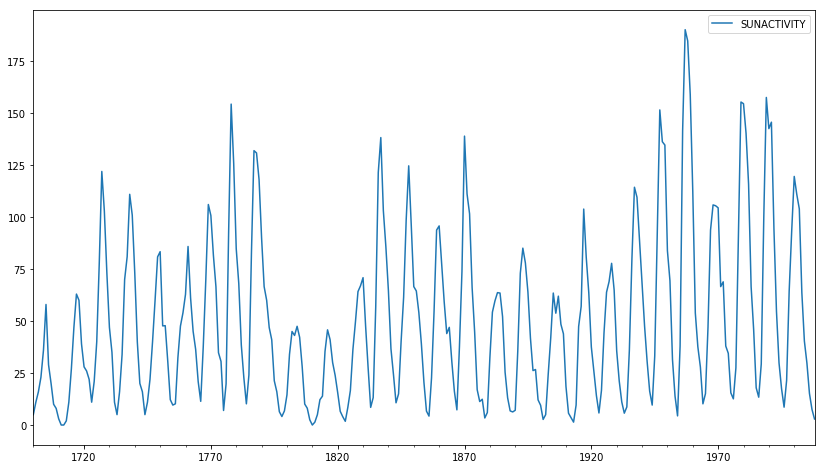

In [16]:
dta.plot(figsize=(14,8));

We will plot now the autocorrelation function (ACF) and the partial autocorrelation function (PACF). Confidence intervals are also shown suggesting that values outside this cone are very likely correlation and not statistical fluctuations.

The most intuitive definition of the PACF that I've found is in the book "Introductory Time Series with R":
    "The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags"

— Page 81, Section 4.5.6 Partial Autocorrelations

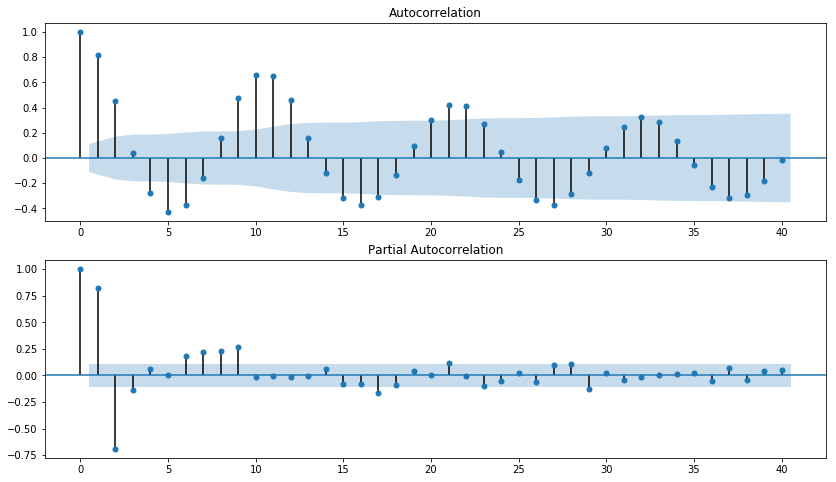

In [17]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

How does it helps to choose the model? We would expect the ACF to be strong to a lag of k if the process is ARMA(k,0) = AR(k) and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened. The PACF suggest that there would be no correlation for lag values beyond k.

Now that we have estimated the order k we can fit a model to data.

In [22]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=-1)

/home/javier/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [23]:
print(arma_mod20.params)

const                49.659389
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


We are going to fit also an ARMA(3,0) model just to compare the results.

In [24]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=-1)

/home/javier/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [25]:
print(arma_mod30.params)

const                49.749977
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


## Criterion for the selection of the order (p,q) of the ARMA model

- How do you decide which one is better ARMA(2,0) or ARMA(3,0)?
- What happens with the MA part?

Information criteria:

$AIC = 2\cdot k -2 \cdot log(\hat{L})$

$BIC = k\cdot log(N) -2\cdot log(\hat{L})$

$HQIC = 2k\cdot log(log(N))-2\cdot log(\hat{L})$

In [26]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.636338063704 2637.569703171295 2628.60672590895


In [27]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.4036286965793 2638.070335081068 2626.8666135031367


How good are these model?

In [29]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.145826904831452

In [30]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.956480935071552

The null hypothesis of the test is that there is no serial correlation. The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. The test statistic equals 2 for r == 0 indicating no serial correlation. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

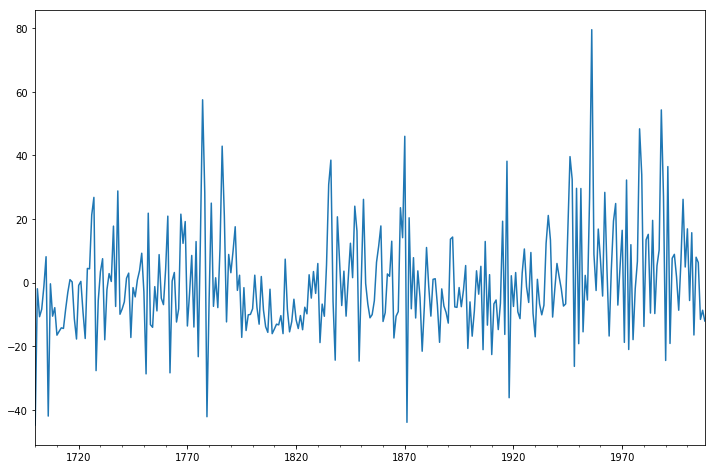

In [31]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [32]:
resid = arma_mod30.resid

In [33]:
stats.normaltest(resid)

NormaltestResult(statistic=49.84499867475388, pvalue=1.5007075329892837e-11)

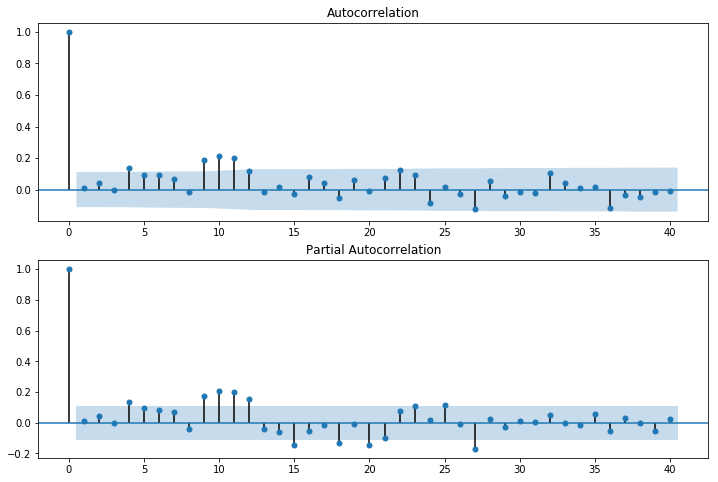

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

## In-sample dynamic prediction

In [35]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)

In [36]:
print(predict_sunspots)

1990-12-31    167.047432
1991-12-31    140.993033
1992-12-31     94.859156
1993-12-31     46.860946
1994-12-31     11.242628
1995-12-31     -4.721254
1996-12-31     -1.166875
1997-12-31     16.185729
1998-12-31     39.021924
1999-12-31     59.449918
2000-12-31     72.170192
2001-12-31     75.376833
2002-12-31     70.436504
2003-12-31     60.731626
2004-12-31     50.201830
2005-12-31     42.076056
2006-12-31     38.114316
2007-12-31     38.454674
2008-12-31     41.963851
2009-12-31     46.869326
2010-12-31     51.423303
2011-12-31     54.399762
2012-12-31     55.321733
Freq: A-DEC, dtype: float64


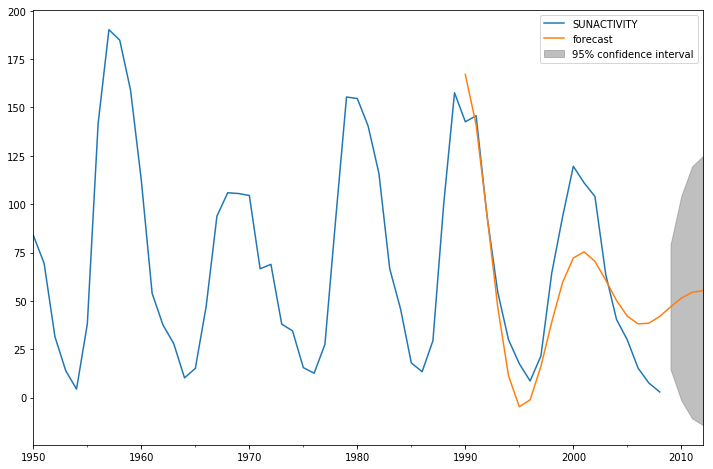

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990','2012', dynamic=True, ax=ax, plot_insample=False)